In [26]:
import qctoolkit as qtk
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style()

%matplotlib inline

In [2]:
data = qtk.pload('heavy_atoms.pkl')

In [36]:
free_ref = np.load('ref_free.npy')
part_ref = np.load('ref_part.npy')
no_ref = np.zeros([3, 3, 3])
tail_ref = np.empty([3,3,3], dtype=object)

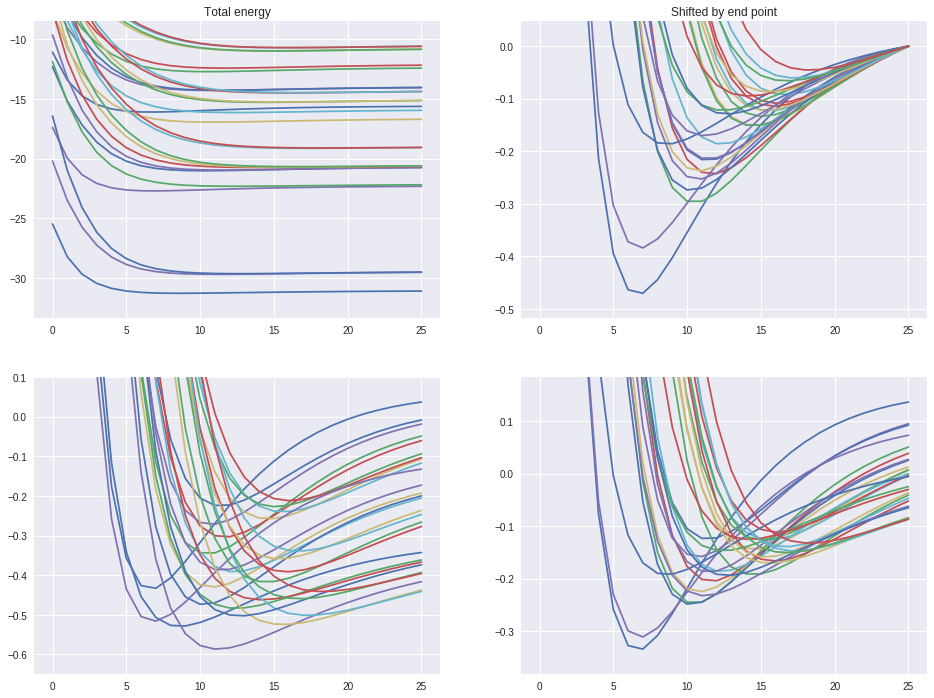

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(16,12))

ref_list = [no_ref, tail_ref, free_ref, part_ref]

for r in range(len(ref_list)):
    ref = ref_list[r]
    i = r / 2
    j = r % 2
    
    E_data = []
    for col in range(len(data)):
        for row in range(len(data[col])):
            for grp in range(len(data[col, row])):
                E = data[col, row, grp]['E']
                E_ref = ref[col, row, grp]
                if E_ref is None:
                    E_ref = E[-1]
                E = E - E_ref
                E_data.append(E)
                axs[i, j].plot(E)
    E_data = np.array(E_data)
    y_min = np.min(E_data)
    y_max = np.max(E_data[:, -1])
    p_min, p_max = y_min - 0.1 * (y_max - y_min), y_max + 0.1 * (y_max - y_min)
    axs[i, j].set_ylim(p_min, p_max)
    
#axs.ylim(-0.7, 0.5)

axs[0,0].set_title('Total energy')
axs[0,1].set_title('Shifted by end point')
axs[1,0].set_title('atomization energy')
axs[1,1].set_title('binding energy')